# 서울시 가구원수별 가구수(구별) 통계

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import time
import re

In [2]:
%%time
household = pd.read_csv('./data/household_in_seoul_2019.txt', 
    sep='\t', 
    names=['기간', '구별', '일반가구수', '1인', '2인', '3인', '4인', '5인', '6인', '7인 이상', '평균가구원수'],
    skiprows=[0,1,2],
    encoding='utf-8'
)
household.replace(',', '', regex=True, inplace=True)
str2num = ['일반가구수', '1인', '2인', '3인', '4인', '5인', '6인', '7인 이상', '평균가구원수']
household[str2num] = household[str2num].apply(pd.to_numeric)
household.head()

Wall time: 13 ms


,기간,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2019,종로구,62652,24671,16208,11154,7828,2143,505,143,2.2
1,2019,중구,54496,22078,14578,9540,6292,1533,373,102,2.1
2,2019,용산구,93177,35148,25164,17439,11736,2907,612,171,2.2
3,2019,성동구,122770,41488,32125,25634,18379,4014,877,253,2.3
4,2019,광진구,149905,58714,35678,28054,21454,4711,1006,288,2.2


In [3]:
%%time
population = pd.read_csv('./data/population_in_seoul_2019.txt', 
    sep='\t', 
    names=['기간', '구별', '세대', '인구', '인구남자', '인구여자', '한국인', '한국인남자', '한국인여자', '등록외국인', '등록외국인남자', '등록외국인여자', '세대당인구', '고령자'], 
    usecols=['기간', '구별', '인구', '한국인', '등록외국인', '고령자'], 
    skiprows=[0,1,2,3],
    encoding='utf-8'
)
population.replace(',', '', regex=True, inplace=True)
str2num = ['인구', '한국인', '등록외국인', '고령자']
population[str2num] = population[str2num].apply(pd.to_numeric)
population.head()

Wall time: 7.99 ms


,기간,구별,인구,한국인,등록외국인,고령자
0,2019,종로구,161869,151290,10579,27519
1,2019,중구,136488,126171,10317,23275
2,2019,용산구,245185,228670,16515,38791
3,2019,성동구,308979,300889,8090,43947
4,2019,광진구,366972,351350,15622,47902


In [4]:
cctv = pd.read_excel('./data/CCTV_in_Seoul.xlsx')
cctv.rename(columns={'기관명': '구별', '소계': 'CCTV'}, inplace=True)
cctv['구별'].replace(' ', '', regex=True, inplace=True)
cctv.replace(',', '', regex=True, inplace=True)
str2num = ['CCTV', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년']
cctv[str2num] = cctv[str2num].apply(pd.to_numeric)
cctv.head()

,구별,CCTV,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [5]:
tmp = pd.merge(household, population, on='구별')
del tmp['기간_x']
del tmp['기간_y']
df = pd.merge(tmp, cctv, on='구별')
df.head()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수,...,고령자,CCTV,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,종로구,62652,24671,16208,11154,7828,2143,505,143,2.2,...,27519,1471,8.0,7.0,599.0,132,195,148,281,101
1,중구,54496,22078,14578,9540,6292,1533,373,102,2.1,...,23275,1544,25.0,165.0,114.0,80,245,270,317,328
2,용산구,93177,35148,25164,17439,11736,2907,612,171,2.2,...,38791,2063,1279.0,152.0,201.0,107,102,89,60,73
3,성동구,122770,41488,32125,25634,18379,4014,877,253,2.3,...,43947,2679,665.0,109.0,118.0,101,258,201,933,294
4,광진구,149905,58714,35678,28054,21454,4711,1006,288,2.2,...,47902,1581,470.0,42.0,83.0,87,64,21,468,346


In [6]:
df['CCTV비율'] = df['CCTV'] / df['CCTV'].sum() * 100

## Visualization

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

# Jupyter Notebook
%matplotlib inline

# korean Font
matplotlib.font_manager._rebuild()
sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist if f.name.startswith('Malgun')])
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

# palette
sns.set_palette('pastel')

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Axis1
dates = [d.strftime('%Y') for d in pd.date_range('2012','2019', freq='Y')]
cols = list(map(lambda x: x+'년', dates))
ax1_x = dates
ax1_y = correlation[cols].loc['CCTV'].to_list()
ax1 = axes[0]
ax1.plot(ax1_x, ax1_y, marker='o', label='correlation')
ax1.set_ylim(0, 1)
ax1.set_title('CCTV 년도별 상관관계 추세 분석')
ax1.legend()

# Axis2
df2 = df.sort_values(by='CCTV', ascending=True)
df2.index = np.arange(0, len(df2))

df2_label = df.sort_values(by='CCTV', ascending=False).head(10)
df2_label = df2_label[['구별', 'CCTV']]
df2_label['CCTV'] = df2_label['CCTV'].apply(lambda x: '{:,}'.format(x))
df2_label.index = np.arange(0, len(df2_label))

ax2 = axes[1]
ax2_x = df2['구별']
ax2_y = df2['CCTV']
ax2.barh(ax2_x, ax2_y, label=df2_label)
ax2.set_title('CCTV 설치 현황')
ax2.set_xlabel('CCTV'); ax2.set_ylabel('구별')
ax2.legend()

# Axis3
# df3 = df.sort_values(by='CCTV', ascending=True)
# df3.index = np.arange(0, len(df3))
# ax3 = axes[2]
# ax3_ratio = df3['CCTV비율']
# ax3_labels = df3['구별']
# ax3_wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
# ax3.pie(ax3_ratio, labels=ax3_labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=ax3_wedgeprops)
# ax3.set_title('CCTV 설치 비율')

# Figure
fig.suptitle('2018 서울시 구별 CCTV 통계', fontsize=18, fontweight='bold')

plt.show()

NameError: name 'correlation' is not defined

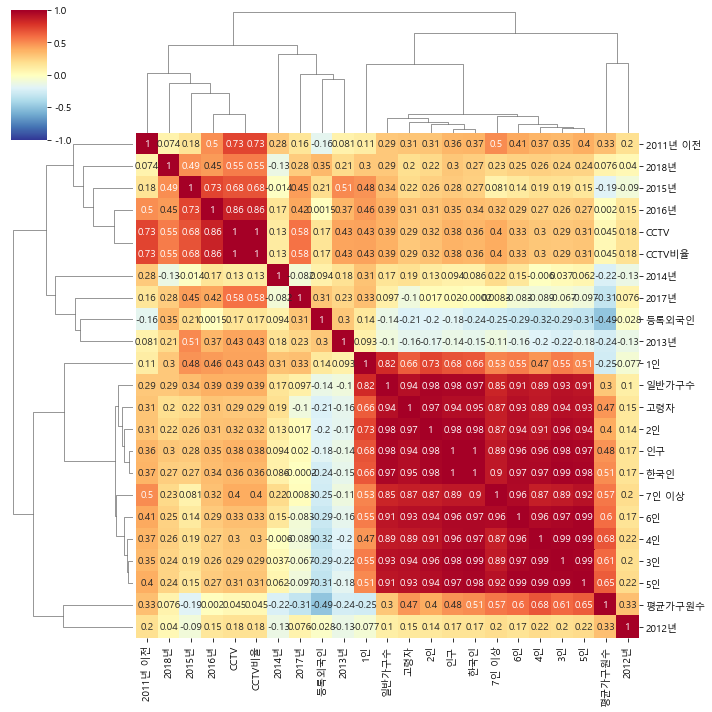

In [35]:
correlation = df.corr()

# 상관관계 분석 시각화
sns.clustermap(correlation, 
    annot = True,      # 실제 값 화면에 나타내기
    cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
    vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


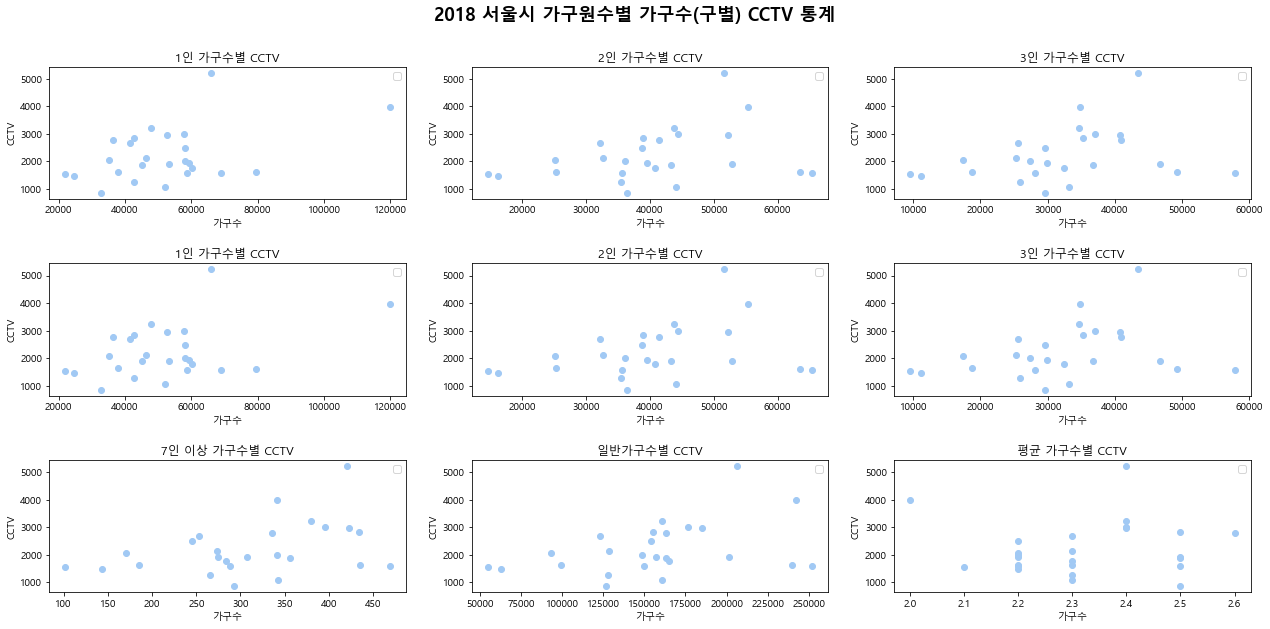

In [124]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 9))

# Axis1
for row in np.arange(0, 2):
    for col in np.arange(0, 3):
        scol = col + 1
        axis = axes[row, col]
        axis.scatter(df['{}인'.format(scol)], df['CCTV'])
        axis.set_title('{}인 가구수별 CCTV'.format(scol))
        axis.set_xlabel('가구수'.format(scol))
        axis.set_ylabel('CCTV')

# Axis2
axis = axes[2, 0]
axis.scatter(df['7인 이상'], df['CCTV'])
axis.set_title('7인 이상 가구수별 CCTV')
axis.set_xlabel('가구수')
axis.set_ylabel('CCTV')

# Axis3
axis = axes[2, 1]
axis.scatter(df['일반가구수'], df['CCTV'])
axis.set_title('일반가구수별 CCTV')
axis.set_xlabel('가구수')
axis.set_ylabel('CCTV')

# Axis4
axis = axes[2, 2]
axis.scatter(df['평균가구원수'], df['CCTV'])
axis.set_title('평균 가구수별 CCTV')
axis.set_xlabel('가구수')
axis.set_ylabel('CCTV')

# Figure
fig.suptitle('2018 서울시 가구원수별 가구수(구별) CCTV 통계', fontsize=18, fontweight='bold')
fig.tight_layout(pad=2)

plt.show()